In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylayers.util.geomutil import *
from pylayers.util.plotutil import *
import matplotlib.pyplot as plt
import shapely.geometry as shg

`Geomutil` is a module which gathers different geometrical functions used in other module of pylayers.



# Class Polygon

This class implements the visibility graph, of a Polygon.

The Polygon class is a subclass of the shapely polygon class. 
It allows to initialize a Polygon with different object (list,np.array,sh.MultiPoint)



In [4]:
points = shg.MultiPoint([(0, 0), (1, 1), (2, 0), (1, 0),(0,-2)])
poly1 = Polygon(points)
poly2 = Polygon(p=[[3,4,4,3],[1,1,2,2]])
N = 7
phi = np.linspace(0,2*np.pi,N)
x = 3*np.cos(phi)+5
y = 3*np.sin(phi)+5
nppoints  = np.vstack((x,y))
poly3  = Polygon(nppoints)

## ploting polygons

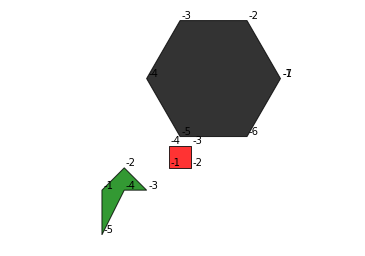

In [5]:
fig = plt.figure()
ax = fig.gca()
plt.axis('off')
plt.axis('equal')
fig,ax=poly1.plot(color='green',fig=fig,ax=ax)
fig,ax=poly2.plot(color='red',fig=fig,ax=ax)
fig,ax=poly3.plot(color='#000000',fig=fig,ax=ax)

## `buildGv()`

Dertermine visibility relationships in a Polygon. Returns a graph

This function is used for determining visibility relationships in indoor environement.



(-0.5, 4.0, -0.5, 2.5)

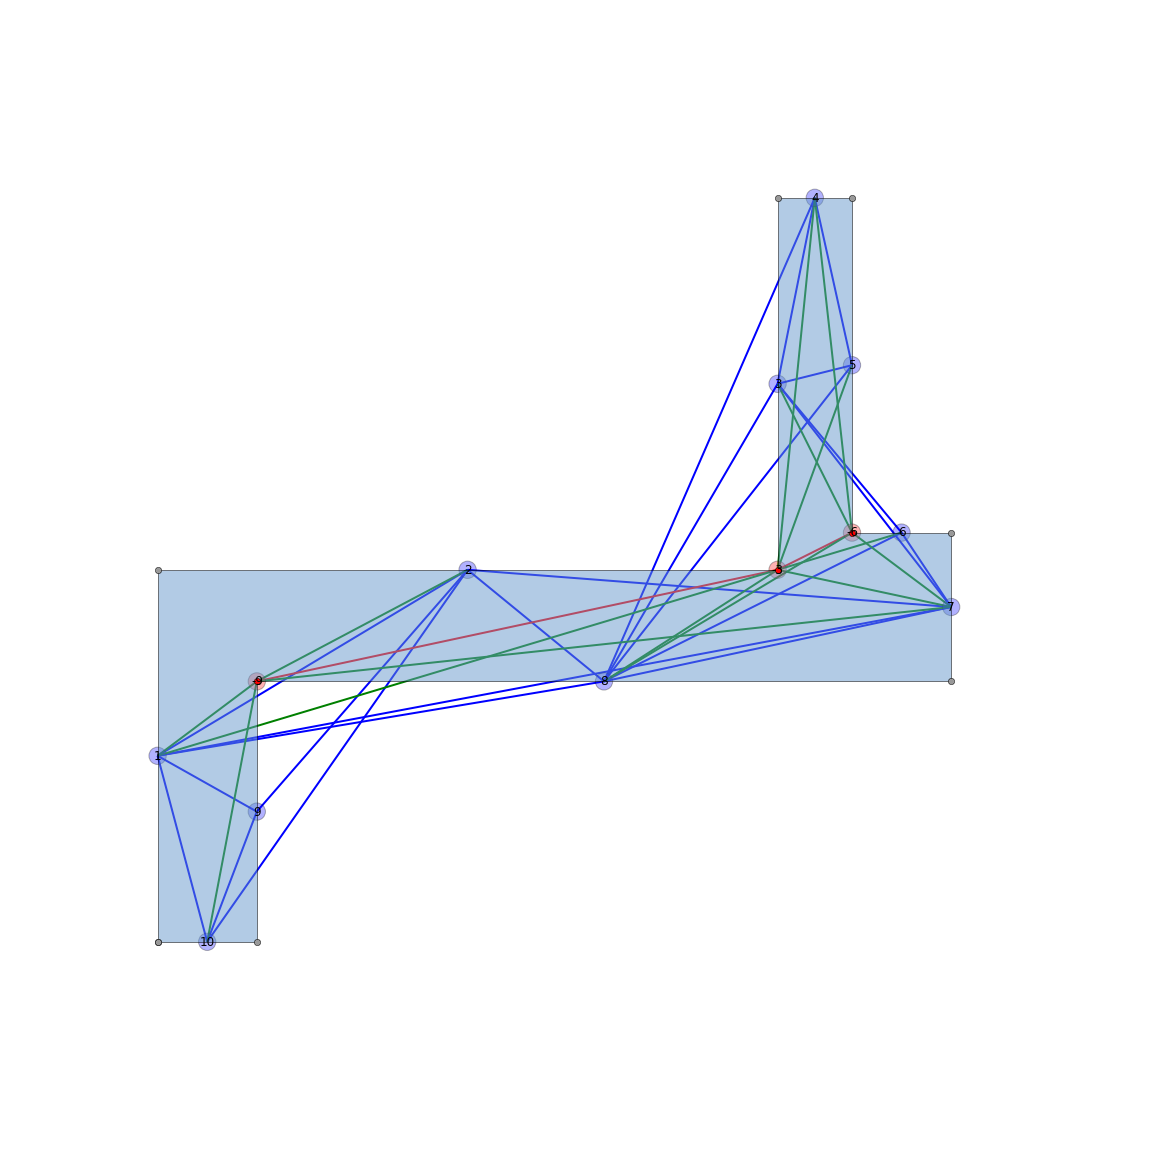

In [6]:
fig = plt.figure(figsize=(8,8))
points  = shg.MultiPoint([(0, 0), (0, 1), (2.5,1), (2.5, 2), \
                                          (2.8,2), (2.8, 1.1), (3.2, 1.1), \
                                          (3.2, 0.7), (0.4, 0.7), (0.4, 0)])
polyg   = Polygon(points)
Gv      = polyg.buildGv(show=True)
plt.axis('off')

# Geomview classes

## GeomVect class

This class is used to interact with geomview 3D viewer. 



### geomBase

Display a base 

In [7]:
v1 = np.array([1,0,0])
v2 = np.array([0,1,0])
v3 = np.array([0,0,1])
M  = np.vstack((v1,v2,v3))
gv = GeomVect('test')
gv.geomBase(M)
#gv.show3()

### points

display a set of points 

In [8]:
gv1 = GeomVect('test1')
gv1.points(np.random.rand(3,10))
#gv1.show3()

ndarray method converts a Polygon object to an ndarray 

In [9]:
geo = Geomoff('test2')
pt  = poly3.ndarray().T
pt1 = np.hstack((pt,np.zeros((7,1))))


This class is used in module vrml2geom

In [10]:
polys = [[0,1,2,3,4,5,6]]
geo.polygons(pt1,polys)
#geo.show3()

In [11]:
poly = [0,1,2,3,4,5,6]
geo.polygon(pt1,poly)
#geo.show3()

In [12]:
np.zeros((7,1))

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [13]:
extrem=np.array([-2,2,-2,2,-2,2])

### plotting a box 

In [14]:
geo=Geomoff('test3')
geo.box()

In [15]:
#geo.show3()

## Utility functions

### angledir

angledir converts a 3D vector into the 2 spherical angle $\theta$, $\phi$ expressed in radians

In [16]:
s = np.array([[2,0,0],[0,2,0],[0,0,1],[1,1,1]]) 
angledir(s)*180/np.pi

array([[ 90.        ,   0.        ],
       [ 90.        ,  90.        ],
       [  0.        ,   0.        ],
       [ 54.73561032,  45.        ]])

### linet

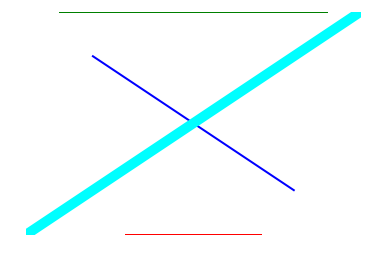

In [17]:
fig = plt.figure()
plt.axis('off')
ax = fig.gca()
p1 = np.array([0,0])
p2 = np.array([1,0])
p3 = np.array([0,1])
p4 = np.array([1,1])
ax = linet(ax,p1,p2,al=0.7,color='red',linewidth=3)
ax = linet(ax,p2,p3,al=0.8,color='blue',linewidth=2)
ax = linet(ax,p3,p4,al=0.9,color='green',linewidth=1)
ax = linet(ax,p4,p1,al=1,color='cyan',linewidth=10)

### dptseg(p,pt,ph)

this function calculates distances between a set of points and a segment

In [18]:
pt = np.array([0,0])
ph = np.array([10,0])
p  = np.array([[-1,1 ,3,4,11],[8,1,2,3,3]])
d1,d2,h = dptseg(p,pt,ph)


In [19]:
print d1,d2,h

[[ -1.   1.   3.   4.  11.]] [[ 11.   9.   7.   6.  -1.]] [ 8.  1.  2.  3.  3.]


### displot

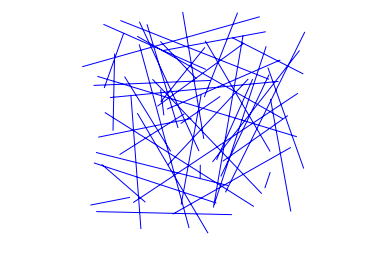

In [20]:
plt.axis('off')
plt.axis('equal')
N   = 50
pt  = sp.rand(2,N)
ph  = sp.rand(2,N)
f,a = displot(pt,ph)

### ptonseg(pta,phe,pt)

used in select.py

In [21]:
pta = np.array([0,0])
phe = np.array([10,0])
pt = np.array([9,8])
p = ptonseg(pta,phe,pt)
print p

[ 9.  0.]


### ptconvex

In [22]:
points  = shg.MultiPoint([(0, 0), (0, 1), (3.2, 1), (3.2, 0.7), (0.4, 0.7), (0.4, 0)])
N = len(points)
polyg   = Polygon(points)
tcc,n   = polyg.ptconvex()       

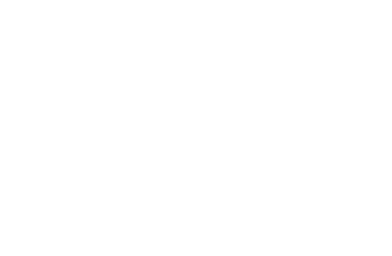

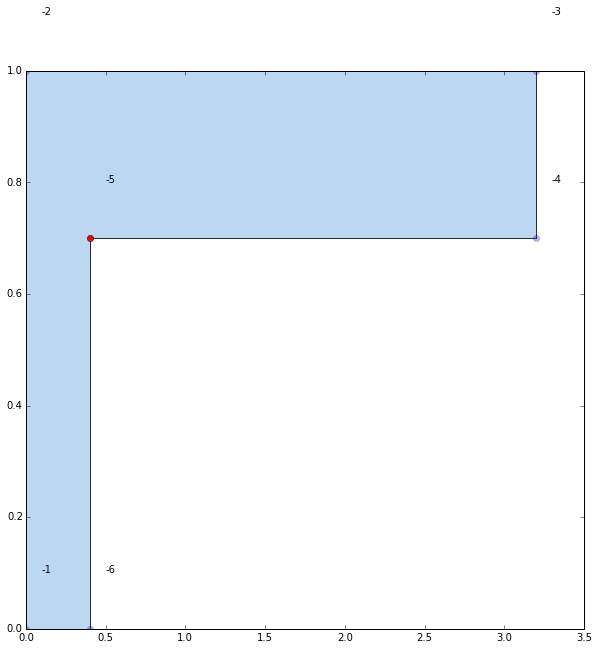

In [23]:
plt.axis('off')
plt.axis('equal')
k = 0
polyg.plot()
for p in points:
    if tcc[k] == 1 :
        plt.plot(p.x, p.y, 'o', color='red',alpha=1)
    else:
        plt.plot(p.x, p.y, 'o', color='blue',alpha=0.3)
    k = k+1


### intersect

intersect(A,B,C,D) wether or not the N segments (AB) intersects N segments (CD). 
The intersection is tested only for the segment of same index in the ndarray. 

In [24]:
from pylayers.util.geomutil import *
from pylayers.util.plotutil import *
import scipy as sp
N1 = 6
N2 = 5
A = sp.rand(2,N1)
B = sp.rand(2,N1)
C = sp.rand(2,N1)
D = sp.rand(2,N1)
b1 = intersect(A,B,C,D)

In [25]:
b1

array([False, False,  True, False, False, False], dtype=bool)

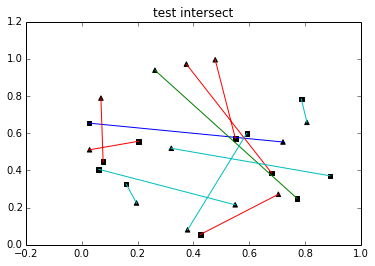

In [26]:
pt1 = A[:,b1]
ph1 = B[:,b1]
pt2 = C[:,b1]
ph2 = D[:,b1]
pt3 = A[:,(1-b1).astype(bool)]
ph3 = B[:,(1-b1).astype(bool)]
pt4 = C[:,(1-b1).astype(bool)]
ph4 = D[:,(1-b1).astype(bool)]
f1,a1 = displot(pt1,ph1,'r')
f2,a2 = displot(pt2,ph2,'b')
f3,a3 = displot(pt3,ph3,'c')
f4,a4 = displot(pt4,ph4,'y')
ti = plt.title('test intersect')

In [27]:
b1

array([False, False,  True, False, False, False], dtype=bool)

In [28]:
(1-b1).astype('bool')

array([ True,  True, False,  True,  True,  True], dtype=bool)

In [29]:
b1.all()

False

In [30]:
b1.any()

True

## Useful functions

In [31]:
pts = np.array([-27.835,  10.891])
phs = np.array([-27.836,  10.926])

ptk = np.array([-27.833,  10.686])
phk = np.array([-27.835,  10.891])


In [32]:
isaligned(pts,phs,ptk)

True

In [33]:
isaligned(pts,phs,phk)

True

(-27.836000000000002, -27.832500000000003, 10.65, 10.950000000000001)

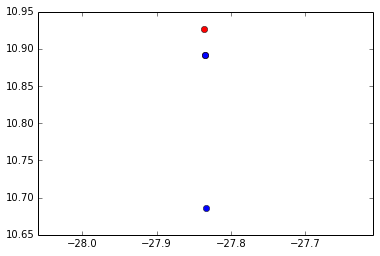

In [34]:
plt.plot(pts[0],pts[1],'or')
plt.plot(phs[0],phs[1],'or')
plt.plot(ptk[0],ptk[1],'ob')
plt.plot(phk[0],phk[1],'ob')
plt.axis('equal')